In [1]:
%load_ext autoreload
%autoreload 2

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from prophet import Prophet

In [77]:
player = 'Devin Booker'
df = pd.read_csv(f'data/player/box_raw/{player}.csv')
df.rename(columns={'DATE':'ds', 'PTS':'y'}, inplace=True)
df = df[['ds', 'y']]
train_df = df[df['ds'] <= '2023-10-01']
pred_df = df[df['ds'] > '2023-10-01']

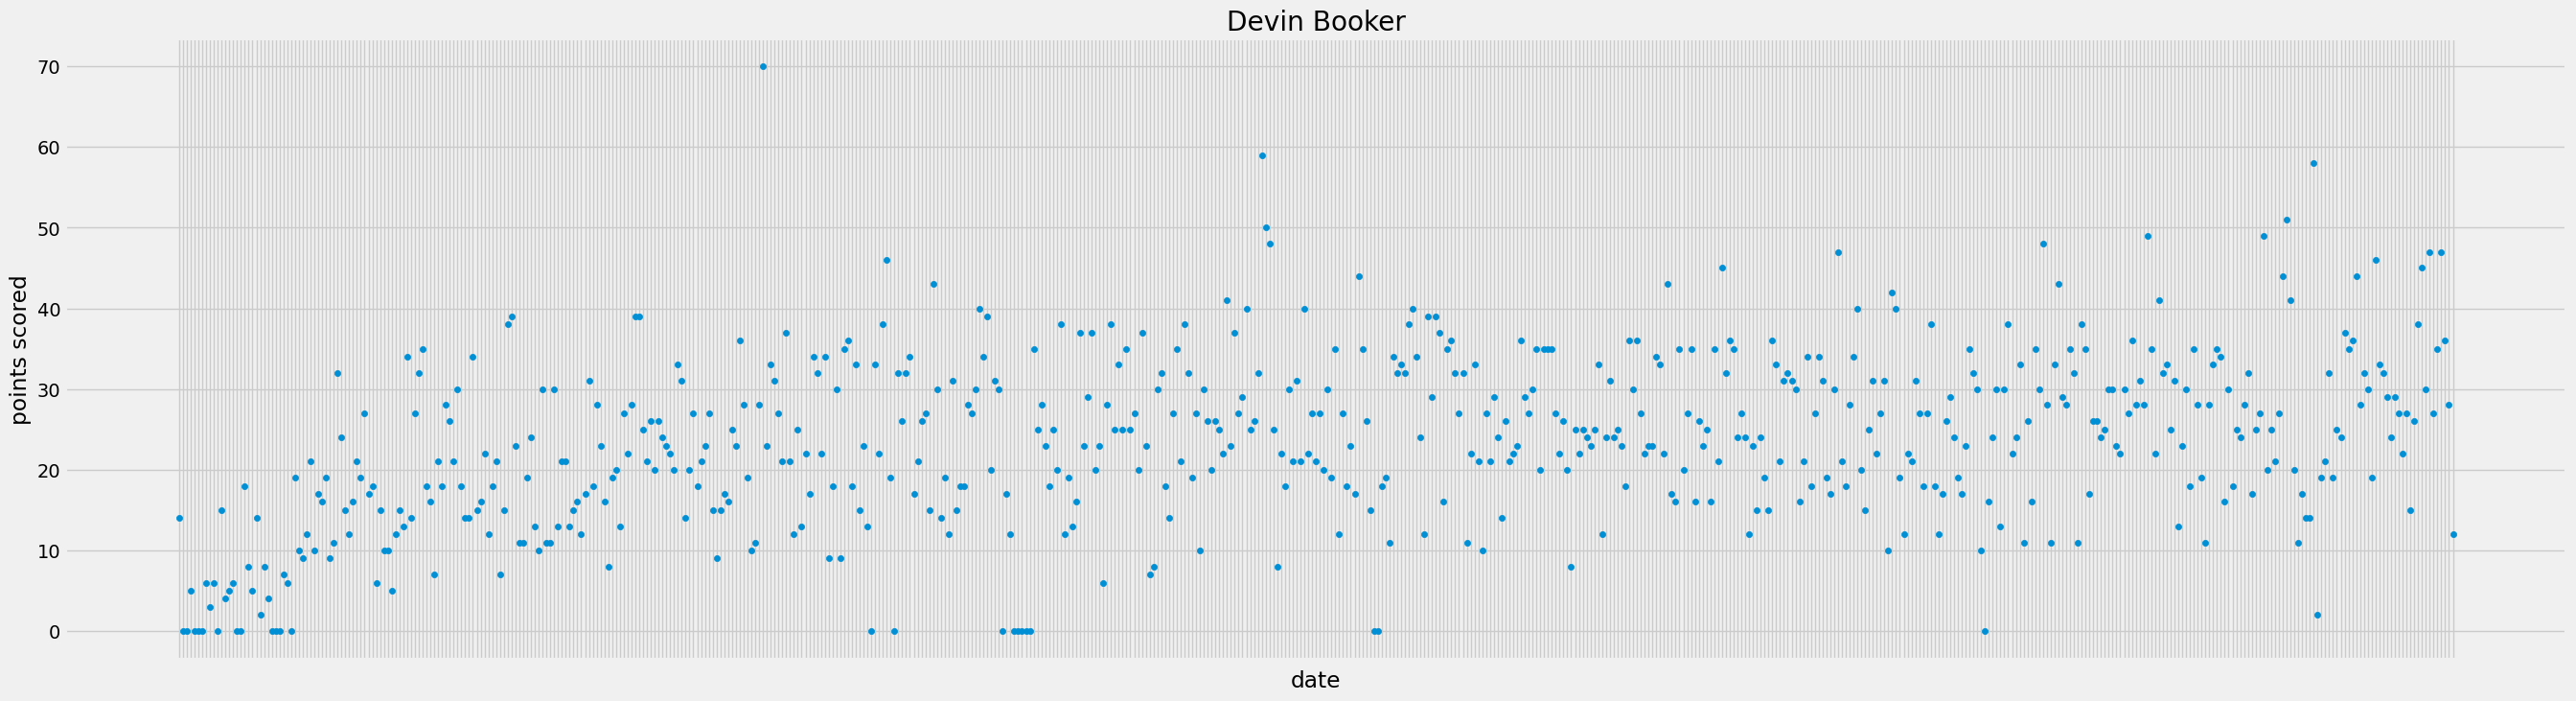

In [78]:
ax = train_df.plot.scatter(x='ds', y='y', figsize=(30, 8))
ax.set_title(player)
ax.set_ylabel('points scored')
ax.set_xlabel('date')
ax.set_xticklabels([]);

In [79]:
model = Prophet(interval_width=0.75)
model.fit(train_df);

16:55:35 - cmdstanpy - INFO - Chain [1] start processing
16:55:35 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
forecast = model.predict(pred_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
67,2024-04-14,28.288152,17.647905,39.535905
68,2024-04-20,30.876782,20.722119,42.513242
69,2024-04-23,29.229210,18.997764,40.007456
70,2024-04-26,30.176357,18.537685,40.871900
71,2024-04-28,29.465761,19.535810,39.982334


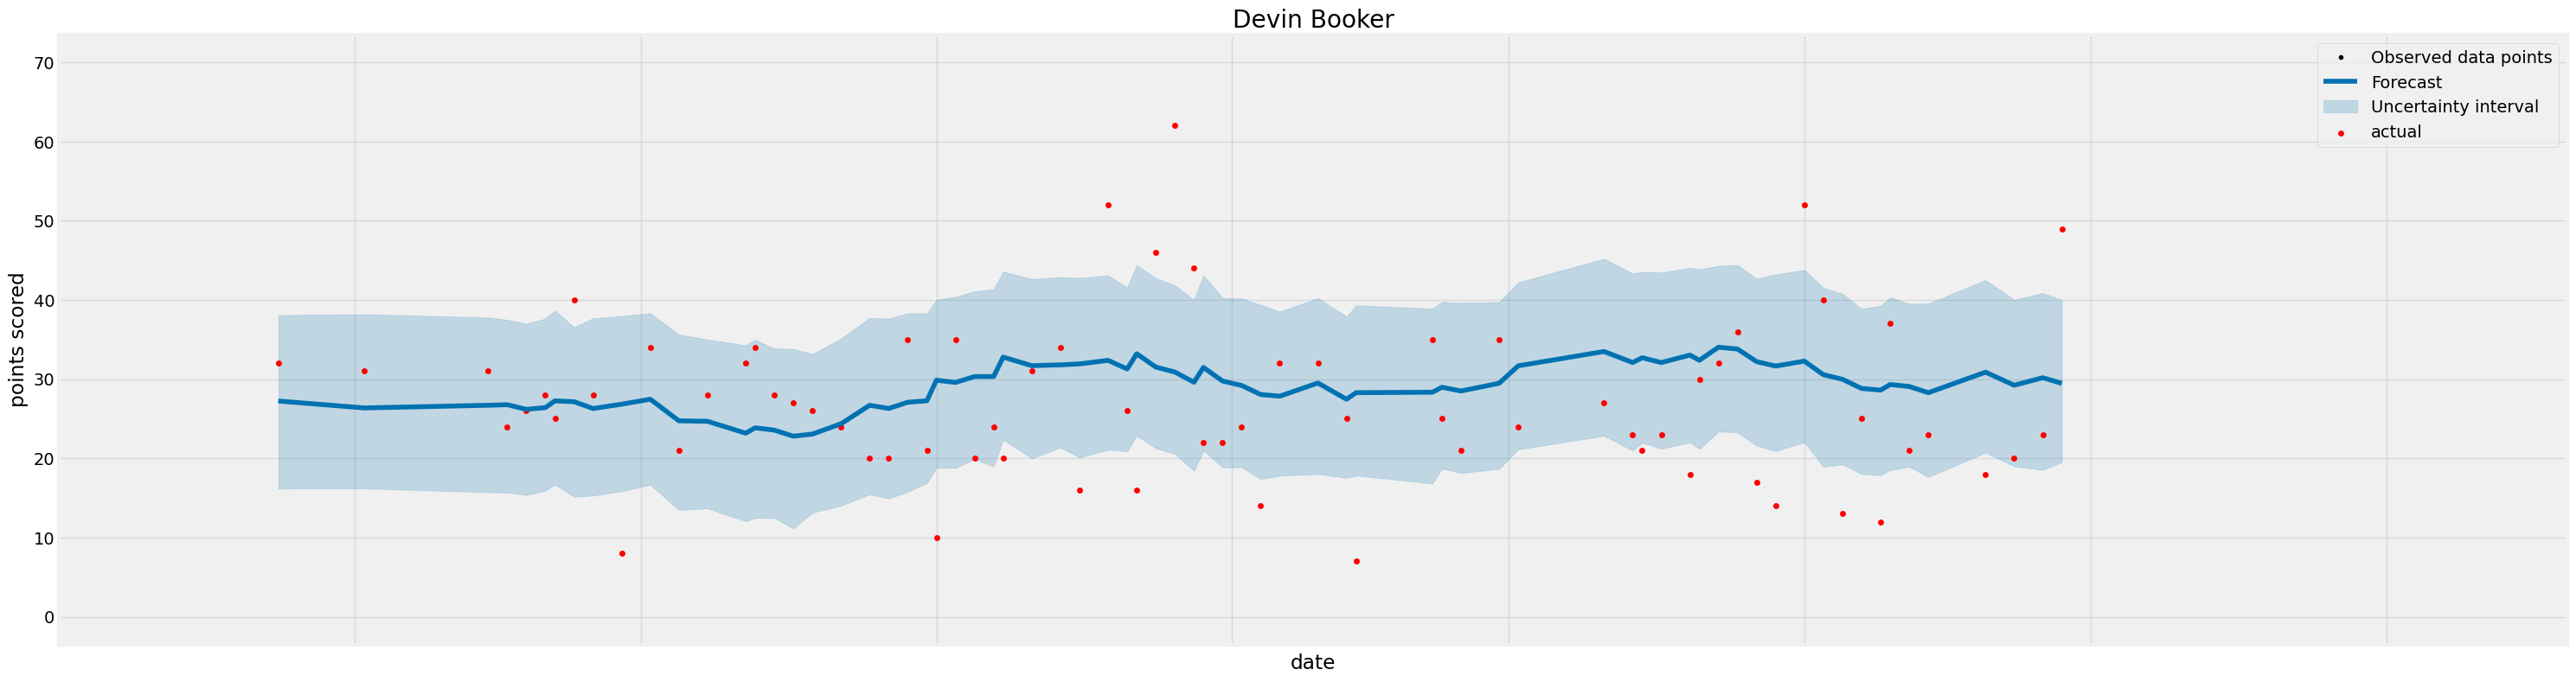

In [82]:
fig = model.plot(forecast, uncertainty=True, figsize=(30, 8))
ax = fig.gca()
ax.set_xlim(pd.to_datetime('2023-10-01'), pd.to_datetime('2024-06-20'))
pred_df.plot.scatter(x='ds', y='y', ax=ax, color='r', label='actual')
ax.legend();
fig.axes[0].set_title(player);
fig.axes[0].set_ylabel('points scored');
fig.axes[0].set_xlabel('date');
fig.axes[0].set_xticklabels([]);